<a href="https://colab.research.google.com/github/shahrokhdel/MachineLearningProjects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train_Titanic.csv")

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [ ]:
def f(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [ ]:
def g(tt):
    if tt in ['Mr']:
        return 1
    elif tt in ['Master']:
        return 3
    elif tt in ['Ms', 'Mlle', 'Miss']:
        return 4
    elif tt in ['Mrs','Mme']:
        return 5
    else:
        return 2

In [ ]:
df['title'] = df['Name'].apply(f).apply(g)
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,5
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,4
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,5
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [ ]:
t = pd.crosstab(df['title'], df['Survived'])
t

Survived,0,1
title,,
1,436,81
2,15,8
3,17,23
4,55,130
5,26,100


In [ ]:
t_pct = t.div(t.sum(1).astype(float), axis=0)
t_pct

Survived,0,1
title,,
1,0.843327,0.156673
2,0.652174,0.347826
3,0.425000,0.575000
4,0.297297,0.702703
5,0.206349,0.793651


Text(0, 0.5, 'Survival Rate')

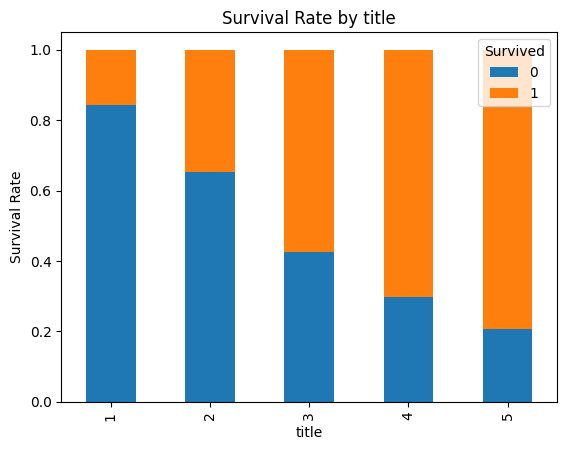

In [ ]:
t_pct.plot(kind='bar',stacked=True, title='Survival Rate by title')

plt.xlabel('title')

plt.ylabel('Survival Rate')

In [ ]:
df = df.drop(['PassengerId','Name','Ticket'], axis=1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,title
0,3,male,22.0,1,0,7.2500,NaN,S,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,5
2,3,female,26.0,0,0,7.9250,NaN,S,1,4
3,1,female,35.0,1,0,53.1000,C123,S,1,5
4,3,male,35.0,0,0,8.0500,NaN,S,0,1


In [ ]:
# Embarked
# get_dummies: Convert categorical variable into dummy/indicator variables
edt  = pd.get_dummies(df['Embarked'])
edt

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [ ]:
df = df.join(edt)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,title,C,Q,S
0,3,male,22.0,1,0,7.2500,NaN,S,0,1,False,False,True
1,1,female,38.0,1,0,71.2833,C85,C,1,5,True,False,False
2,3,female,26.0,0,0,7.9250,NaN,S,1,4,False,False,True
3,1,female,35.0,1,0,53.1000,C123,S,1,5,False,False,True
4,3,male,35.0,0,0,8.0500,NaN,S,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S,0,2,False,False,True
887,1,female,19.0,0,0,30.0000,B42,S,1,4,False,False,True
888,3,female,NaN,1,2,23.4500,NaN,S,0,4,False,False,True
889,1,male,26.0,0,0,30.0000,C148,C,1,1,True,False,False


In [ ]:
df.drop(['Embarked'], axis=1,inplace=True)
df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived,title,C,Q,S
0,3,male,22.0,1,0,7.2500,NaN,0,1,False,False,True
1,1,female,38.0,1,0,71.2833,C85,1,5,True,False,False
2,3,female,26.0,0,0,7.9250,NaN,1,4,False,False,True
